# Project Finance LSTM

## Part 2: Time-series modelling with ARIMA

# Introduction
In Part I, we collected data for S&P 500 for analysis. In Part II, you might be expecting to jump straight to LSTM for price prediction.

In this Part, here's what we're going to do:
1. Load our dataset and libraries
2. Prepare our data via upsampling and backfilling
3. Identify the p, d, and q terms for our ARIMA model through statistical and visual methods
4. Train an ARIMA model
5. Compare the model predictions and actual test data

In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Step 2: Read the S&P 500 CSV as DataFrame
df = pd.read_csv('S&P500 data from yfinance.csv', index_col=0, parse_dates=True)
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
...                 ...          ...          ...          ...          ...   
2019-06-25  2945.780029  2946.520020  2916.010010  2917.379883  2917.379883   
2019-06-26  2926.070068  2932.590088  2912.989990  2913.780029  2913.780029   
2019-06-27  2919.659912  2929.300049  2918.570068  2924.919922  2924.919922   
2019-06-28  2932.939941  2943.979980  2929.050049  2941.760010  2941.760010   
2019-07-01  2971.409912  2977.929932  2952.219971  2964.330078  2964.330078   

                Volume  
Date                    
2000-01-03   931800000  
2000-01-04  1009000000  
2000-01-05  1085500000  
2000-01-06  1092300000  
2000-01-07  1225200000  
...                ...  
2019-06-25  3578050000  
2019-06-26  3478130000  
2019-06-27  3122920000  
2019-06-28  5420700000  
2019-07-01  3513270000  

[4904 rows x 6 columns]

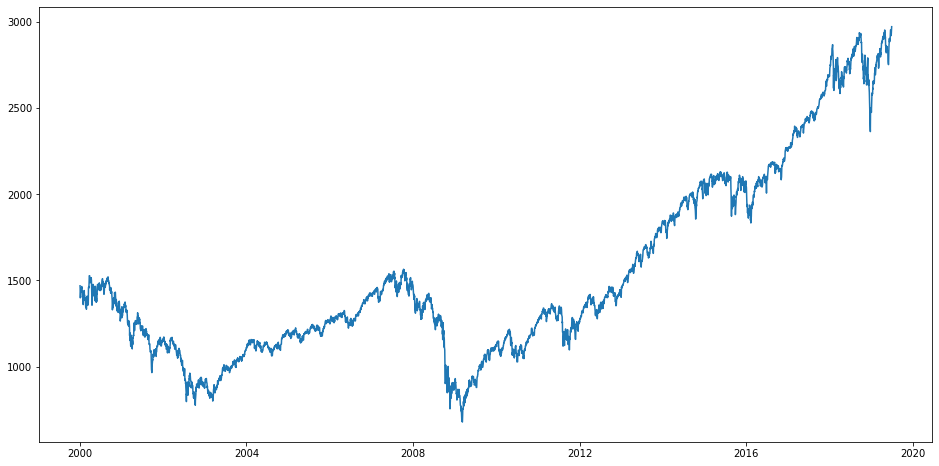

In [7]:
# Step 3: Plot 'Open'
plt.figure(figsize = (16,8))
plt.plot(df['Open'])


## Data preparation

### Step 4: Fill in the missing dates
Time to prepare our dataset for ARIMA modelling. Our current dataset does not have continuous dates in the index because the prices are only available on weekdays. 

To fill in missing dates, we will use the .asfreq method and pass through the 'D' frequency into it, along with an interpolate method to fill the missing values in other columns.

In [8]:
# Step 4a: Call asfreq with 'D', with backfill
df_filled = df.asfreq('D', method='ffill')
df_filled["2000-01-04":"2000-01-11"]

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
2000-01-08  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
2000-01-09  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
2000-01-10  1441.469971  1464.359985  1441.469971  1457.599976  1457.599976   
2000-01-11  1457.599976  1458.660034  1434.420044  1438.560059  1438.560059   

                Volume  
Date                    
2000-01-04  1009000000  
2000-01-05  1085500000  
2000-01-06  1092300000  
2000-01-07  1225200000  
2000-01-08  1225200000  
2000-01-09  1225200000  
2000-01-10  1064800000  
2000-01-11  1014000000

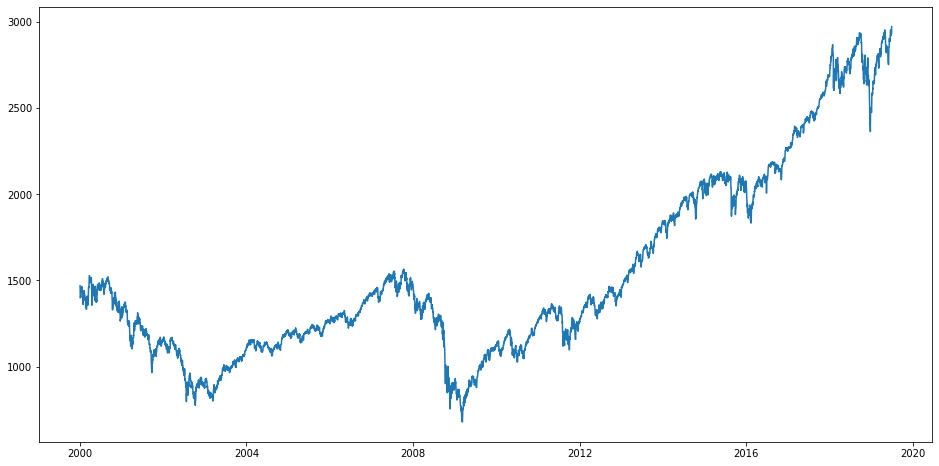

In [10]:
# Step 5: Plot 'Open' from the new DataFrame
plt.figure(figsize = (16,8))
plt.plot(df_filled['Open'])

## Determining the lag term (d)
Looks like the data is not stationary from the plot. As mentioned, we will need to turn our time-series trend into a straight line that oscillates around y=0.

### Step 6: Create a column named first_diff
Create a new column called 'first_diff', that contains the difference between the current Open price and the previous timeframe's Open.

The first row will contain an NA, so don't forget to remove the first row after getting the difference. 

In [11]:
# Step 6: Create a new column named "first_diff"
df_filled['first_diff'] = df_filled['Open'].diff()
df_filled = df_filled.dropna()
df_filled

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
2000-01-08  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
...                 ...          ...          ...          ...          ...   
2019-06-27  2919.659912  2929.300049  2918.570068  2924.919922  2924.919922   
2019-06-28  2932.939941  2943.979980  2929.050049  2941.760010  2941.760010   
2019-06-29  2932.939941  2943.979980  2929.050049  2941.760010  2941.760010   
2019-06-30  2932.939941  2943.979980  2929.050049  2941.760010  2941.760010   
2019-07-01  2971.409912  2977.929932  2952.219971  2964.330078  2964.330078   

                Volume  first_diff  
Date                                
2000-01-04  1009000000  -14.030029  
2000-01-05  1085500000  -55.799927  
2000-01-06  1092300000    2.689941  
2000-01-07  1225200000    1.339966  
2000-01-08  1225200000    0.000000  
...                ...         ...  
2019-06-27  3122920000   -6.410156  
2019-06-28  5420700000   13.280029  
2019-06-29  5420700000    0.000000  
2019-06-30  5420700000    0.000000  
2019-07-01  3513270000   38.469971  

[7119 rows x 7 columns]

### Step 7: Plot first_diff
Now that we've obtained the first difference, i.e. d=1, we now can plot first_diff and assess whether the plot is stationary. 

We anticipate a plot containing values that oscillate around y=0.

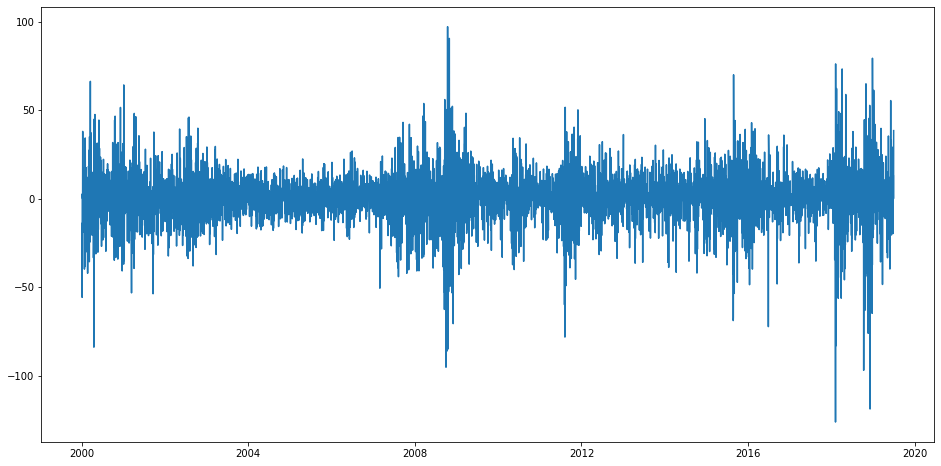

In [12]:
# Step 7: Plot first_diff
plt.figure(figsize = (16,8))
plt.plot(df_filled['first_diff'])

### Use Augmented Dickey Fuller Test to test for stationary nature
Visually, it looks like the plot of first_diff is stationary. 

However, how can we truly tell that our plot is stationary? We use a statistical test called Augmented Dickey Fuller Test. 

The null hypothesis is that the plot is not stationary. The alternative hypothesis is that the plot is stationary. 

When we conduct the test, and the p-value is less than 0.05, we can reject the null hypothesis, i.e. the time series is stationary.

### Step 8: Import adfuller
We'll use statsmodels library for this. Import adfuller from statsmodels.tsa.stattools.

In [14]:
# Step 8: Import adfuller
from statsmodels.tsa.stattools import adfuller

### Step 9: Use adfuller with 'first_df' column data
Now that you've imported adfuller, use it on first_df data.

You'll get a tuple containing a few things so head on to the documentation identify the particular entry in the tuple that is your p-value, and assess whether we reject or fail to reject the null hypothesis.

In [15]:
# Step 9: Use adfuller on 'first_df'
adfuller(df_filled['first_diff'])

(-19.439816690716118,
 0.0,
 20,
 7098,
 {'1%': -3.43127162108596,
  '5%': -2.861947283361622,
  '10%': -2.5669867928635224},
 56206.391034663684)

<details>
    <summary><font color = 'green'>Is our first_diff stationary? (Click once to find out)</font></summary>
    <div>
        <strong>Yes, because you should expect a p-value of less than 0.05 so we can reject the null hypothesis that the time-series is not stationary.</strong>
    </div>
</details>

### [Optional] Use adfuller with 'Open' column data
Try using adfuller with 'Open' column values as well and see what the p-value is.

Before you plot try to imagine what the p-value will be for the 'Open' data, i.e. is it more or less than 0.05?

In [16]:
# Test 'Open' column with adfuller
adfuller(df_filled['Open'])

(1.1534450843727575,
 0.9956479078584245,
 21,
 7097,
 {'1%': -3.431271750993633,
  '5%': -2.861947340761599,
  '10%': -2.5669868234184925},
 56207.065970897245)

To conclude, we found our d value when fitting our 'Open' data later. 

When we take the first difference, i.e. d=1, we obtained a stationary time series. Bear this in mind because we will be using d=1 for our ARIMA modelling in the end.

## Determining the numbers for AR (p) and MA (q) terms
In this section, we will conduct further tests so that we can determine the rest of the two terms for our ARIMA model.

The ACF plots the coefficients of correlation between a time series and lags of itself in a bar chart. 

The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself.

We will use the ACF plot to find the MA (q) term and PACF plot to find the AR (p) term.

### Step 10: Import the plotting libraries
We will import the following libraries:
- plot_acf from statsmodels.graphics.tsaplots
- plot_pacf from statsmodels.graphics.tsaplots

In [18]:
# Step 10: Import the libraries you need
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

### Step 11: Plot PACF of first_diff data
We'll plot the PACF using first_diff, and look for the first x-value that is under the cut-off 0.05 cutoff.

That value will be our AR (p) term. 

<Figure size 1152x576 with 0 Axes>

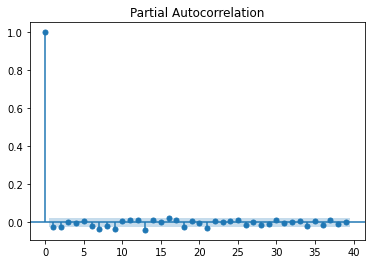

In [19]:
# Step 11: Plot PACF of first_diff
plt.figure(figsize = (16,8))
plot_pacf(df_filled['first_diff'])
plt.show()

### Step 12: Plot ACF of first_diff data
After plotting PACF, we will then plot the ACF of the first_diff values to get our MA term (q).

Similarly, we're looking for the first x-value that falls within the blue box.

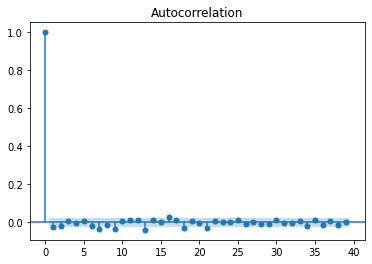

In [20]:
# Step 12: Plot ACF with first_diff
plot_acf(df_filled['first_diff'])
plt.show()

## Modelling ARIMA model
Now that we have obtained our p, d, and q terms, we can now fit our data the ARIMA model with the terms. 

We'll be fitting our 'Open' data into the model with the p, d, and q terms. 

You might be wondering why we're using 'Open' and not 'first_diff' directly, it's because there is differencing done at d=1 so we were testing on the differenced data directly.

### Step 13: Split data into train and test
In the research paper, the authors split the data into train and test. 

- Train data: January 3 2000 to May 16 2019
- Test data: May 17 2019 to July 1 2019

Slice the DataFrame according to those dates, and assign them to two separate variables.

In [21]:
# Step 13a: Split your DataFrame into train using the dates
train = df_filled[:'2019-05-16']
train

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
2000-01-08  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
...                 ...          ...          ...          ...          ...   
2019-05-12  2863.100098  2891.310059  2825.389893  2881.399902  2881.399902   
2019-05-13  2840.189941  2840.189941  2801.429932  2811.870117  2811.870117   
2019-05-14  2820.120117  2852.540039  2820.120117  2834.409912  2834.409912   
2019-05-15  2820.379883  2858.679932  2815.080078  2850.959961  2850.959961   
2019-05-16  2855.800049  2892.149902  2855.800049  2876.320068  2876.320068   

                Volume  first_diff  
Date                                
2000-01-04  1009000000  -14.030029  
2000-01-05  1085500000  -55.799927  
2000-01-06  1092300000    2.689941  
2000-01-07  1225200000    1.339966  
2000-01-08  1225200000    0.000000  
...                ...         ...  
2019-05-12  3529600000    0.000000  
2019-05-13  3894030000  -22.910156  
2019-05-14  3322720000  -20.069824  
2019-05-15  3125950000    0.259766  
2019-05-16  3338060000   35.420166  

[7073 rows x 7 columns]

In [22]:
# Step 13b: Split your DataFrame into test using the dates
test = df_filled['2019-05-17':]
test

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-05-17  2858.600098  2885.479980  2854.229980  2859.530029  2859.530029   
2019-05-18  2858.600098  2885.479980  2854.229980  2859.530029  2859.530029   
2019-05-19  2858.600098  2885.479980  2854.229980  2859.530029  2859.530029   
2019-05-20  2841.939941  2853.860107  2831.290039  2840.229980  2840.229980   
2019-05-21  2854.020020  2868.879883  2854.020020  2864.360107  2864.360107   
2019-05-22  2856.060059  2865.469971  2851.110107  2856.270020  2856.270020   
2019-05-23  2836.699951  2836.699951  2805.489990  2822.239990  2822.239990   
2019-05-24  2832.409912  2841.360107  2820.189941  2826.060059  2826.060059   
2019-05-25  2832.409912  2841.360107  2820.189941  2826.060059  2826.060059   
2019-05-26  2832.409912  2841.360107  2820.189941  2826.060059  2826.060059   
2019-05-27  2832.409912  2841.360107  2820.189941  2826.060059  2826.060059   
2019-05-28  2830.030029  2840.510010  2801.580078  2802.389893  2802.389893   
2019-05-29  2790.250000  2792.030029  2766.060059  2783.020020  2783.020020   
2019-05-30  2786.939941  2799.000000  2776.739990  2788.860107  2788.860107   
2019-05-31  2766.149902  2768.979980  2750.520020  2752.060059  2752.060059   
2019-06-01  2766.149902  2768.979980  2750.520020  2752.060059  2752.060059   
2019-06-02  2766.149902  2768.979980  2750.520020  2752.060059  2752.060059   
2019-06-03  2751.530029  2763.070068  2728.810059  2744.449951  2744.449951   
2019-06-04  2762.639893  2804.489990  2762.639893  2803.270020  2803.270020   
2019-06-05  2818.090088  2827.280029  2800.919922  2826.149902  2826.149902   
2019-06-06  2828.510010  2852.100098  2822.449951  2843.489990  2843.489990   
2019-06-07  2852.870117  2884.969971  2852.870117  2873.340088  2873.340088   
2019-06-08  2852.870117  2884.969971  2852.870117  2873.340088  2873.340088   
2019-06-09  2852.870117  2884.969971  2852.870117  2873.340088  2873.340088   
2019-06-10  2885.830078  2904.770020  2885.510010  2886.729980  2886.729980   
2019-06-11  2903.270020  2910.610107  2878.530029  2885.719971  2885.719971   
2019-06-12  2882.729980  2888.570068  2874.679932  2879.840088  2879.840088   
2019-06-13  2886.239990  2895.239990  2881.989990  2891.639893  2891.639893   
2019-06-14  2886.820068  2894.449951  2879.620117  2886.979980  2886.979980   
2019-06-15  2886.820068  2894.449951  2879.620117  2886.979980  2886.979980   
2019-06-16  2886.820068  2894.449951  2879.620117  2886.979980  2886.979980   
2019-06-17  2889.750000  2897.270020  2887.300049  2889.669922  2889.669922   
2019-06-18  2906.709961  2930.790039  2905.439941  2917.750000  2917.750000   
2019-06-19  2920.550049  2931.739990  2911.429932  2926.459961  2926.459961   
2019-06-20  2949.600098  2958.060059  2931.500000  2954.179932  2954.179932   
2019-06-21  2952.709961  2964.149902  2946.870117  2950.459961  2950.459961   
2019-06-22  2952.709961  2964.149902  2946.870117  2950.459961  2950.459961   
2019-06-23  2952.709961  2964.149902  2946.870117  2950.459961  2950.459961   
2019-06-24  2951.419922  2954.919922  2944.050049  2945.350098  2945.350098   
2019-06-25  2945.780029  2946.520020  2916.010010  2917.379883  2917.379883   
2019-06-26  2926.070068  2932.590088  2912.989990  2913.780029  2913.780029   
2019-06-27  2919.659912  2929.300049  2918.570068  2924.919922  2924.919922   
2019-06-28  2932.939941  2943.979980  2929.050049  2941.760010  2941.760010   
2019-06-29  2932.939941  2943.979980  2929.050049  2941.760010  2941.760010   
2019-06-30  2932.939941  2943.979980  2929.050049  2941.760010  2941.760010   
2019-07-01  2971.409912  2977.929932  2952.219971  2964.330078  2964.330078   

                Volume  first_diff  
Date                                
2019-05-17  3257950000    2.800049  
2019-05-18  3257950000    0.000000  
2019-05-19  3257950000    0.000000  
2019-05-20  3288870000  -16.660156  
2019

## Predict and plot
Now that we've obtained the three terms, i.e. p=2, d=1, q=2, and split our data, we can now fit the data and subsequently plot our predictions.

### Step 14: Import ARIMA 
Let's import ARIMA from statsmodels.tsa.arima_model.

In [23]:
# Step 14: Import ARIMA
from statsmodels.tsa.arima_model import ARIMA

### Step 15: Declare ARIMA model and fit train data
Declare a variable containing your ARIMA object. It should have two things:
- your train set's 'Open' price
- order parameter with (3,1,2)

After that, call the .fit method on the variable and assign the results to a new variable. 

That's because the .fit method returns an ARIMAResults object, and you can make forecasts using that object.

In [61]:
# Step 15a: Declare an ARIMA model
mod = ARIMA(train['Open'], order=(3,1,0))

In [62]:
# Step 15b: Call .fit() on the variable and asign the results to the new variable
res = mod.fit()

### Step 16: Get the ARIMA forecasts
It's time! Call the .forecast method on the ARIMAResults object you got from Step 15b. 

Take note of the <strong>steps</strong> parameter. If you call it as is, you'll only get 1 forecast. 

You need to add the <em>length of the test DataFrame</em> into the <strong>steps</strong> parameter.

Once you call the .forecast method with the steps, the method will return a tuple containing three items. 

The first item is what you want, i.e. an array containing your forecasts.

In [63]:
# Step 16a: Call the .forecast method using the variable from Step 15b and assign the results into a variable
forecast = res.forecast(steps = len(test))
forecast

(array([2855.01121171, 2854.4241952 , 2854.74486106, 2854.95564171,
        2855.14889029, 2855.34716971, 2855.54547302, 2855.74362054,
        2855.94178292, 2856.13994855, 2856.3381134 , 2856.53627823,
        2856.73444309, 2856.93260794, 2857.13077279, 2857.32893765,
        2857.5271025 , 2857.72526736, 2857.92343221, 2858.12159706,
        2858.31976192, 2858.51792677, 2858.71609162, 2858.91425648,
        2859.11242133, 2859.31058619, 2859.50875104, 2859.70691589,
        2859.90508075, 2860.1032456 , 2860.30141046, 2860.49957531,
        2860.69774016, 2860.89590502, 2861.09406987, 2861.29223473,
        2861.49039958, 2861.68856443, 2861.88672929, 2862.08489414,
        2862.28305899, 2862.48122385, 2862.6793887 , 2862.87755356,
        2863.07571841, 2863.27388326]),
 array([12.80283267, 17.86590792, 21.62001589, 24.83418036, 27.67962231,
        30.25793993, 32.63319363, 34.8469361 , 36.92820646, 38.89827614,
        40.77326757, 42.56574691, 44.28573439, 45.94137277, 47.539

In [64]:
# Step 16b: Assign the first item of the tuple into a variable
forecast_array = forecast[0]
forecast_array

array([2855.01121171, 2854.4241952 , 2854.74486106, 2854.95564171,
       2855.14889029, 2855.34716971, 2855.54547302, 2855.74362054,
       2855.94178292, 2856.13994855, 2856.3381134 , 2856.53627823,
       2856.73444309, 2856.93260794, 2857.13077279, 2857.32893765,
       2857.5271025 , 2857.72526736, 2857.92343221, 2858.12159706,
       2858.31976192, 2858.51792677, 2858.71609162, 2858.91425648,
       2859.11242133, 2859.31058619, 2859.50875104, 2859.70691589,
       2859.90508075, 2860.1032456 , 2860.30141046, 2860.49957531,
       2860.69774016, 2860.89590502, 2861.09406987, 2861.29223473,
       2861.49039958, 2861.68856443, 2861.88672929, 2862.08489414,
       2862.28305899, 2862.48122385, 2862.6793887 , 2862.87755356,
       2863.07571841, 2863.27388326])

In [65]:
# Step 17: Create a Series of the forecast
forecast_series = pd.Series(forecast_array, index = test.index)
forecast_series

Date
2019-05-17    2855.011212
2019-05-18    2854.424195
2019-05-19    2854.744861
2019-05-20    2854.955642
2019-05-21    2855.148890
2019-05-22    2855.347170
2019-05-23    2855.545473
2019-05-24    2855.743621
2019-05-25    2855.941783
2019-05-26    2856.139949
2019-05-27    2856.338113
2019-05-28    2856.536278
2019-05-29    2856.734443
2019-05-30    2856.932608
2019-05-31    2857.130773
2019-06-01    2857.328938
2019-06-02    2857.527103
2019-06-03    2857.725267
2019-06-04    2857.923432
2019-06-05    2858.121597
2019-06-06    2858.319762
2019-06-07    2858.517927
2019-06-08    2858.716092
2019-06-09    2858.914256
2019-06-10    2859.112421
2019-06-11    2859.310586
2019-06-12    2859.508751
2019-06-13    2859.706916
2019-06-14    2859.905081
2019-06-15    2860.103246
2019-06-16    2860.301410
2019-06-17    2860.499575
2019-06-18    2860.697740
2019-06-19    2860.895905
2019-06-20    2861.094070
2019-06-21    2861.292235
2019-06-22    2861.490400
2019-06-23    2861.688564
2019-06

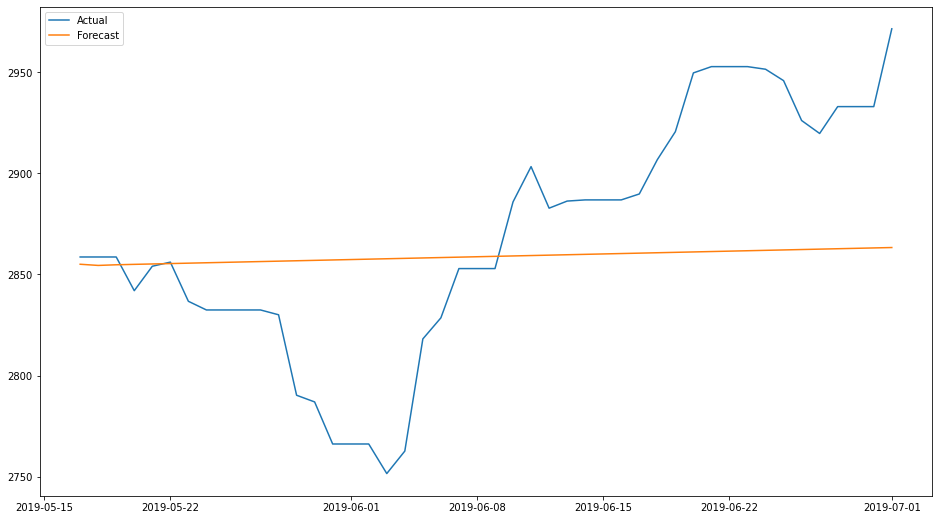

In [66]:
# Step 18: Plot the forecast with test data
plt.figure(figsize = (16,9))
plt.plot(test['Open'])
plt.plot(forecast_series)
plt.legend(['Actual', 'Forecast'])